<img style="float: left; width: 260px;" src="images/svm-linsep.png">
***
# <font color="grey">$\quad$ Lecture 18 - Support Vector Machines</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\conv}{\operatorname{conv}}$
$\newcommand{\inter}{{\operatorname{int}}}$

In this lecture we return to the task of classification. As seen earlier, examples include spam filters, letter recognition, or text classification. In this lecture we introduce a popular method for classification, **Support Vector Machines (SVMs)**, from the point of view of convex optimization.

---
### <font color="grey">18.1 Support Vector Machines for Linear Classification</font>
---

In the simplest case there is a set of labels $\mathcal{Y}=\{-1,1\}$ and the set of training points $\{\vct{x}_1,\dots,\vct{x}_n\}$ is *linearly separable*: this means that there exists an affine hyperplane $h(\vct{x})=\vct{w}^{\trans}\vct{x}+b$ such that $h(\vct{x}_i)>0$ if $y_i=1$ and $h(\vct{x}_j)<0$ if $y_j=-1$. We call the points for which $y_i=1$ *positive*, and the ones for which $y_j=-1$ *negative*.
The problem of finding such a hyperplane can be posed as a linear programming feasibility problem as follows: we look for a vector of *weights* $\vct{w}$ and a *bias term* $b$ (together a $(p+1)$-dimensional vector) such that 

\begin{equation*}
  \vct{w}^{\trans}\vct{x}_i+b\geq 1, \text{ for } y_i=1, \quad \vct{w}^{\trans}\vct{x}_j+b\leq -1, \text{ for } y_j=-1.
\end{equation*}

Note that we can replace the $+1$ and $-1$ with any other positve or negative quantity by rescaling the $\vct{w}$ and $\vct{b}$, so this is just convention. We can also describe the two inequalities concisely as

(1) \begin{equation*}
  y_i(\vct{w}^{\trans}\vct{x}_i+b)-1 \geq 0.
\end{equation*}

A hyperplane separating the two point sets will in general not be unique.
As we want to use the linear classifier on new, yet unknown data, we want to find a separating hyperplane with best possible **margin**. Let $d_+$ and $d_-$ denote the distance of a separating hyperplane to the closest positive and closest negative point, respectively. The quantity $d=d_++d_-$ is then called the margin or the classifier, and we want to find a hyperplane with largest possible margin.

<img style="float: center; width: 320px;" src="images/svm-linsep.png">

We next show that the margin for a separating hyperplane that satisfies (1) is $d=2/\norm{\vct{w}}_2$.
Given a hyperplane $H$ described in (1) and a point $\vct{x}$ such that we have the equality $\vct{w}^{\trans}\vct{x}+b=1$ (the point is as close as possible to the hyperplane, also called a **support vector**), the distance of that point to the hyperplane can be computed by first taking the difference of $\vct{x}$ with a point $\vct{p}$ on $H$ (an *anchor*), and then computing the dot product of $\vct{x}-\vct{p}$ with the unit vector $\vct{w}/\norm{\vct{w}}$ orthogonal to $H$ (see Calculus and Vectors A, math10121).

<img style="float: center; width: 320px;" src="images/linproj.png">

As anchor point $\vct{p}$ we can just choose a multiple $c\vct{w}$ that is on the plane, i.e., that satisfies $\ip{\vct{w}}{c\vct{w}}+b=0$. This implies that $c=-b/\norm{\vct{w}}^2$, and consequently $\vct{p} = -(b/\norm{\vct{w}}^2) \vct{w}$. The distance is then

\begin{align*}
  d_+ &= \ip{\vct{x}+\frac{b}{\norm{\vct{w}}^2}\vct{w}}{\frac{\vct{w}}{\norm{\vct{w}}}} = \frac{\ip{\vct{x}}{\vct{w}}}{\norm{\vct{w}}}+\frac{b}{\norm{\vct{w}}^2}\ip{\vct{w}}{\frac{\vct{w}}{\norm{\vct{w}}}}\\ 
  &= \frac{1-b}{\norm{\vct{w}}}+\frac{b}{\norm{\vct{w}}} = 
  \frac{1}{\norm{\vct{w}}}.
\end{align*}

Similarly, we get $d_-=1/\norm{\vct{w}}$. The margin of this particular separating hyperplane is thus $d=2/\norm{\vct{w}}$. If we want to find a hyperplane with *largest* margin, we thus have to solve the quadratic optimization problem

\begin{align*}
\minimize & \frac{1}{2}\norm{\vct{w}}^2\\
\subjto & y_i(\vct{w}^{\trans}\vct{x}_i+b)-1 \geq 0, \quad 1\leq i\leq n.
\end{align*}

Note that $b$ is also an unknown variable in this problem! 
The factor $1/2$ in the objective function is just to make the gradient look nicer. The Lagrangian of this problem is

\begin{align*}
\mathcal{L}(\vct{w},b,\vct{\lambda}) &= \frac{1}{2}\norm{\vct{w}}^2 - \sum_{i=1}^m \lambda_i y_i \vct{w}^{\trans}\vct{x}_i-\lambda_iy_ib+\lambda_i\\
&= \frac{1}{2}\vct{w}^{\trans}\vct{w}-\vct{\lambda}^{\trans}\mtx{X}\vct{w}-b\vct{\lambda}^{\trans}\vct{y}+\sum_{i=1}^m \lambda_i,
\end{align*}
 
where we denote by $\mtx{X}$ the matrix with the $y_i\vct{x}_i^{\trans}$ as rows. We can then write the conditions on the gradient with respect to $\vct{w}$ and $b$ of the Lagrangian as

(2)\begin{align*}
 \nabla_{\vct{w}} \mathcal{L}(\vct{w},b,\vct{\lambda}) & = \vct{w}-\mtx{X}^{\trans}\vct{\lambda} = \zerovct \\
 \frac{\partial \mathcal{L}}{\partial b}(\vct{w},b,\vct{\lambda}) &= \vct{y}^{\trans}\vct{\lambda} = 0.
\end{align*}

Replacing $\vct{w}$ by $\mtx{X}^{\trans}\vct{\lambda}$ and $\vct{\lambda}^{\trans}\vct{y}$ by $0$ in the Lagrangian function then gives the expression for the Lagrange dual $g(\vct{\lambda})$,

\begin{equation*}
  g(\vct{\lambda}) = -\frac{1}{2}\vct{\lambda}^{\trans}\mtx{X}\mtx{X}^{\trans}\vct{\lambda}+\sum_{i=1}^m \lambda_i.
\end{equation*}

Finally, changing the sign and the maximum with a minimum, we can formulate the Lagrange dual optimization problem as

(3)\begin{equation*}
\minimize \frac{1}{2}\vct{\lambda}^{\trans}\mtx{X}\mtx{X}^{\trans}\vct{\lambda}- \vct{\lambda}^{\trans}\vct{e} \subjto \vct{\lambda}\geq \zerovct,
\end{equation*}

where $\vct{e}$ is the vector of all ones. 

Note that there is one dual variable $\lambda_i$ per data point $\vct{x}_i$. We can find the optimal value by solving the dual problem (3), but that does not give us automatically the weights $\vct{w}$ and the bias $b$. We can find the weights by $\vct{w}=\mtx{X}^{\trans}\vct{\lambda}$. As for $b$, this is best determined from the KKT conditions of the problem. These can be written by combining the constraints of the primal problem with the conditions on the gradient of the Lagrangian (2), the condition $\vct{\lambda}\geq \zerovct$, and complementary slackness as

\begin{align*}
   \mtx{X}\vct{w}+b\vct{y}-\vct{e} &= \zerovct\\
   \vct{\lambda}&\geq \zerovct\\
   \lambda_i (1-y_i(\vct{w}^{\trans}\vct{x}_i+b)) &= 0 \text{ for } 1\leq i\leq n\\
   \vct{w}-\mtx{X}^{\trans}\vct{\lambda} &= \zerovct\\
   \vct{y}^{\trans}\vct{\lambda} &= 0.
\end{align*}

To get $b$, we can choose one of the equations in which $\lambda_i\neq 0$, and then find $b$ by setting $b= y_i(1-y_i\vct{w}^{\trans}\vct{x}_i)$. With the KKT conditions written down, we can go about solving the problem of finding a maximum margin linear classifier using methods such as the barrier method.

---
### <font color="grey">18.2 Extensions</font>
---

So far we looked at the particularly simple case where (a) the data falls into two classes, (b) the points can actually be well separated, and (c) they can be separated by an affine hyperplane. In reality, these three assumptions may not hold. We briefly discuss extensions of the basic model to account for the three situations just mentioned.

**Non-exact separation.** What happens when the data can not be separated by a hyperplane? In this case the constraints can not be satisfied: there is no feasible solution to the problem. We can still modify the problem to allow for *misclassification*: we want to find a hyperplane that separates the two point sets as good as possible, but we allow for some mistakes.

One approach is to add an additional set of $n$ *slack variables* $s_1,\dots,s_n$, and modify the constraints to

\begin{equation*}
  \vct{w}^{\trans}\vct{x}_i+b\geq 1-s_i, \text{ for } y_i=1, \quad \vct{w}^{\trans}\vct{x}_j+b\leq -1+s_j, \text{ for } y_j=-1, \quad s_i\geq 0.
\end{equation*}

The $i$-th data point can land on the wrong side of the hyperplane if $s_i>1$, and consequently the sum $\sum_{i=1}^n s_i$ is an upper bound on the number of errors possible. If we want to minimize the number of misclassified points, we may want to minimize this upper bound, so a sensible choice for objective function would be to add a multiple of this sum. The new problem thus becomes

\begin{align*}
  \minimize &\frac{1}{2}\norm{\vct{w}}^2+\mu\sum_{j=1}^n s_j\\
\subjto & y_i(\vct{w}^{\trans}\vct{x}_i+b)-1+s_i \geq 0, \quad 1\leq i\leq n\\
& s_i\geq 0, \quad 1\leq i\leq n,
\end{align*} 

for some parameter $\mu$. The Lagrangian of this problem and the KKT conditions can be derived in a similar way as in the separable case and are left as an exercise. 

**Non-linear separation and kernels.** The key to extending SVMs from linear to non-linear separation is the observation that the dual form of the optimization problem (3) depends only on the dot products $\ip{\vct{x}_i}{\vct{x}_j}$ of the data points. In fact, the $(i,j)$-th entry of the matrix $\mtx{X}\mtx{X}^{\trans}$ is precisely $\ip{\vct{x}_i}{\vct{x}_j}$!

If we map our data into a higher (possibly infinite) dimensional space $\mathcal{H}$,

\begin{equation*}
  \phi\colon \R^p \to \mathcal{H},
\end{equation*}

and consider the data points $\phi(\vct{x}_i)$, $1\leq i\leq n$, then applying the support vector machine to these higher dimensional vectors will only depend on the dot products 

\begin{equation*}
K(\vct{x}_i,\vct{x}_j) = \ip{\phi(\vct{x}_i)}{\phi(\vct{x}_j)}.
\end{equation*}

The function $K$ is called a **kernel function**. A typical example, often used in practice, is the Gaussian radial basis function (RBF),

\begin{equation*}
  K(\vct{x},\vct{y}) = e^{-\norm{\vct{x}-\vct{y}}^2/2\sigma^2}.
\end{equation*}

Note that we *don't need to know how the function $\phi$ looks like*! In the equation for the hyperplane we simply replace $\vct{w}^{\trans}\vct{x}$ with $K(\vct{w},\vct{x})$. The only difference now is that the function ceases to be linear in $\vct{x}$: we get a non-linear decision boundary.

**Multiple classes.** One is often interested in classifying data into more than two classes. There are two simple ways in which support vector machines can be extended for such problems: one-vs-one and one-vs-rest. In the one-vs-one case, given $k$ classes, we train one classifier for each pair of classes in the training data, obtaining a total of $k(k-1)/2$ classifiers. When it comes to prediction, we apply each of the classifiers to our test data and choose the class that was chosen the most among all the classifiers. In the one-vs-rest approach, each train $k$ binary classifiers: in each one, one class corresponds to a chosen class, and the second class corresponds to the rest. By associating confidence scores to each classifier, we choose the one with the highest confidence score.

**Example: digit recognition.** An example that uses all three extensions mentioned is handwritten digit recognition. Suppose we have a series of pixels, each representing a number, and associated labels $\{0,1,2,3,4,5,6,7,8,9\}$. We would like to train a support vector machine to recognize new digits. Given the knowledge we have, we can implement this task using standard optimization software such as CVXPY. Luckily, there are packages that have this functionality already implemented, such as the \textsc{Scikit-learn} package for Python. We illustrate its functioning below. The code also illustrates some standard procedures when tackling a machine learning problem:

* **Separate** the data set randomly into *training data* and *test data*;
* **Create** a support vector classifier with optional parameters;
* **Train** (using \textsc{fit}) the classifier with the training data;
* **Predict** the response using the test data and compare with the true response;
* **Report** the results.

An important aspect to keep in mind is that when testing the performance using the test data, we should compare the classification accuracy to a naive baseline: if, for example, $80\%$ of the test data is classified as $+1$, then making a prediction of $+1$ for all the data will give us an accuracy of $80\%$; in this case, we would want our classifier to perform considerably better than getting the right answer $80\%$ of the time!

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

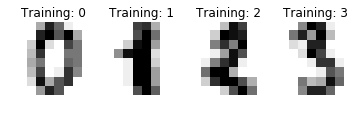

In [4]:
# The digits dataset
digits = datasets.load_digits()

# Display images and labels
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.savefig('images/train-digits.png')

# Turn images into 1-D arrays
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create classifier
svc = svm.SVC(gamma=0.001)

# Randomly split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.4, random_state=0)
svc.fit(X_train, y_train)

In [5]:
# Compare prediction with known test set
predicted = svc.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (svc, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        60
          1       0.97      1.00      0.99        73
          2       1.00      0.97      0.99        71
          3       1.00      1.00      1.00        70
          4       1.00      1.00      1.00        63
          5       1.00      0.98      0.99        89
          6       0.99      1.00      0.99        76
          7       0.98      1.00      0.99        65
          8       1.00      0.99      0.99        78
          9       0.99      1.00      0.99        74

avg / total       0.99      0.99      0.99       719




In [6]:
import skimage
from skimage import data
from skimage.transform import resize
from skimage import io
import os

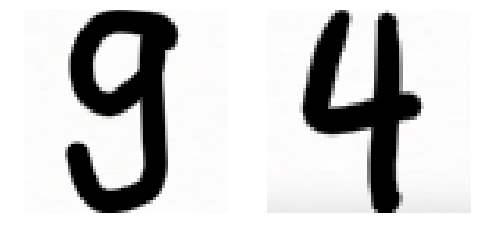

In [7]:
mydigit1 = io.imread('images/digit9.png')
mydigit2 = io.imread('images/digit4.png')
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(mydigit1, cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(mydigit2, cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.show()

In [8]:
# Need to do some pre-processing here, in particular reducing size
smalldigit1 = resize(mydigit1, (8,8))
smalldigit2 = resize(mydigit2, (8,8))
mydigits = np.concatenate((np.round(15*(np.ones((8,8))-smalldigit1[:,:,0])).reshape((64,1)).T,
                           np.round(15*(np.ones((8,8))-smalldigit2[:,:,0])).reshape((64,1)).T),axis=0)

guess = svc.predict(mydigits)
print guess

[9 4]
